In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
digits = load_digits()

In [3]:
# Print the shape of the images loaded and the respective digit number #
print("Image Data Shape", digits.data.shape) # each image is represented in one row with 64 pixels values that varies from 0 to 16
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


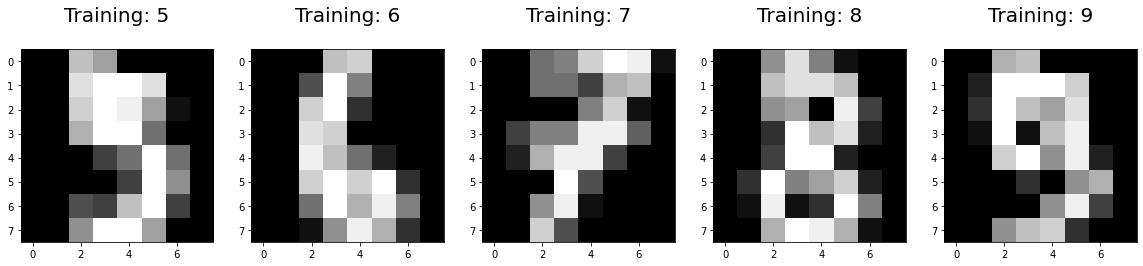

In [4]:
# Plot images with digits from 5 to 9 that will be trained in the model, as an example #
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[5:10], digits.target[5:10])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)

In [5]:
# Split the data in training images(x_train), training digits values (y_train): 80% of the data and #
# between testing images (x_test), testing digits values (y_test): 20$ of data. #
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)
# Set maximum interations to a high value like 1000, the default is 100 and it's lower than the number of interations needed #
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
# Run the fit to create a logistic regression model using the independent variables (x_train) and the dependent variables (y_train)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [6]:
# Run the model to see the predict value to a certain image #
print(logisticRegr.predict(x_test[2].reshape(1, -1)))

[9]


In [7]:
# Score compute the accuracy that is performed by the model #
score = logisticRegr.score(x_test, y_test)
print(score)

0.9416666666666667


In [8]:
# Run the model to all the test data #
predictions = logisticRegr.predict(x_test)
# Create a confusion matrix that allows a better model performance visualization #
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  2  1  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 40  0  0  0  1]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  1  0  0  0 34  1]
 [ 0  0  0  0  0  1  0  0  1 26]]


Text(0.5, 1.0, 'Accuracy Score: 0.9416666666666667')

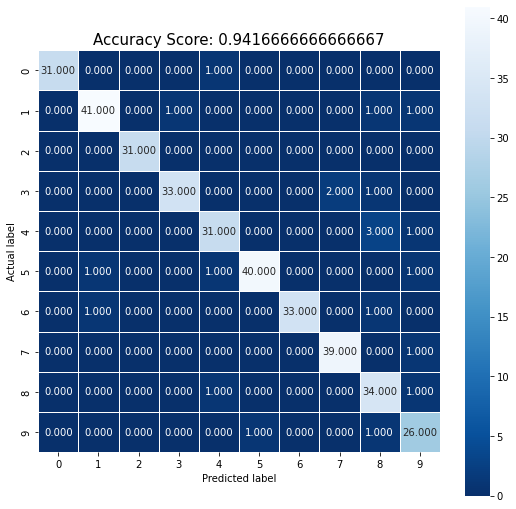

In [9]:
# Generate the heatmap which represents the confusion matrix with graduated colors #
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15)

In [10]:
# Creates an array with a sequence of integers with the number of digits that area predict equally to the actual digit #
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1


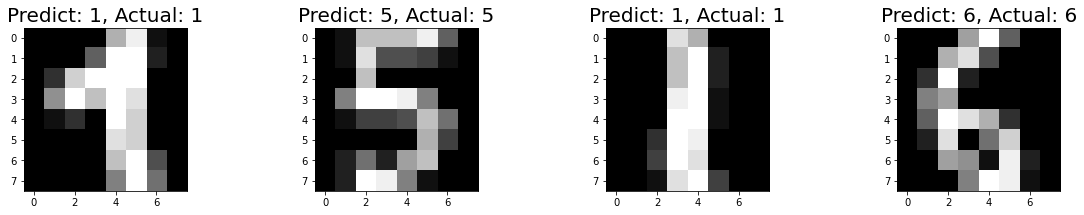

In [12]:
# Plot four figures with the actual and predict value, demonstrating the model accuracy #
plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(classifiedIndex[5:9]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predict: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)
